# Project #2

### E-Commerce Shipping Data
Product Shipment Delivered on time or not? To Meet E-Commerce Customer Demand

###Context

An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

## Content

- The dataset used for model building contained 10999 observations of 12 variables.
- The data contains the following information:

1. ID: ID Number of Customers.
2. Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
3. Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
4. Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
5. Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
6. Cost of the product: Cost of the Product in US Dollars.
7. Prior purchases: The Number of Prior Purchase.
8. Product importance: The company has categorized the product in the various parameter such as low, medium, high.
9. Gender: Male and Female.
10. Discount offered: Discount offered on that specific product.
11. Weight in gms: It is the weight in grams.
12. Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

### 변수 설명
1. ID : 고객들의 ID
2. Warehouse block : 회사는 A, B, C, D, E와 같이 블록으로 나누어 진 큰 창고를 가지고 있음
3. Mode of shipment : 회사는 선박, 비행 및 도로와 같은 다양한 방법으로 제품을 배송함
4. Customer care calls : 배송 조회 문의 전화 건수
5. Customer rating : 회사의 고객평가점수 - 1은 최저 (최악), 5는 최고
6. Cost of the product : 제품의 비용(미국 달러)
7. Prior purchases : 이전 구매 횟수
8. Product importance : 낮음, 중간, 높음 매개 변수로 제품을 분류
9. Gender : 여자/남자 성별
10. Discount offered : 특정 제품에 대한 할인이 제공
11. Weight in gms : 그램 단위의 무게
12. Reached on time : *target* 1은 제품이 정시에 도달하지 않았음, 0은 정시에 도달했음


### Inspiration
This data of Product Shipment Tracking, answer instantly to your questions:

- What was Customer Rating? And was the product delivered on time?
- Is Customer query is being answered?
- If Product importance is high. having higest rating or being delivered on time?


- Customer Rating은 무얼까? 이거에 따라 제품이 정시에 도착했는가?
- 제품의 중요도가 정시에 도착하는 것에 영향을 미치는가?

## EDA

In [2]:
# 데이터 파일을 불러오겠습니다.
from google.colab import files
file_uploaded = files.upload()

Saving Train.csv to Train.csv


In [3]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(file_uploaded['Train.csv']), encoding='cp949')

data.head()

,癤풦D,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
#변수명 이쁘게 설정
data.rename(columns = {"癤풦D": "ID", 'Reached.on.Time_Y.N' : 'Reached_on_time'}, inplace = True)

data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
# ID column drop
# ID는 그냥 고객을 구분하기 위한 고유 번호로, 타겟에 영향을 미치는 특성이 아니므로 제거합니다.
data.drop('ID', inplace = True, axis = 1)

data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
#결측치는 없는 것으로 확인된다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached_on_time      10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Warehouse_block,10999,5,F,3666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mode_of_Shipment,10999,3,Ship,7462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_care_calls,10999,NaN,NaN,NaN,4.05446,1.14149,2,3,4,5,7
Customer_rating,10999,NaN,NaN,NaN,2.99054,1.4136,1,2,3,4,5
Cost_of_the_Product,10999,NaN,NaN,NaN,210.197,48.0633,96,169,214,251,310
Prior_purchases,10999,NaN,NaN,NaN,3.5676,1.52286,2,3,3,4,10
Product_importance,10999,3,low,5297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10999,2,F,5545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discount_offered,10999,NaN,NaN,NaN,13.3732,16.2055,1,4,7,10,65
Weight_in_gms,10999,NaN,NaN,NaN,3634.02,1635.38,1001,1839.5,4149,5050,7846


데이터의 특성을 살펴보겠습니다.

In [8]:
data['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

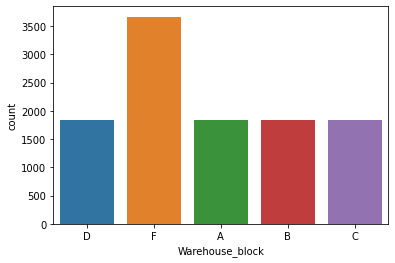

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.countplot(x=data['Warehouse_block']);

In [10]:
data['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

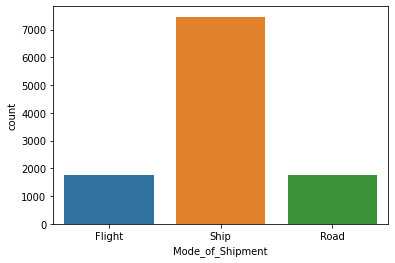

In [11]:
sns.countplot(x=data['Mode_of_Shipment']);

# Ship으로 배송되는 수가 가장 많다.

In [12]:
data['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

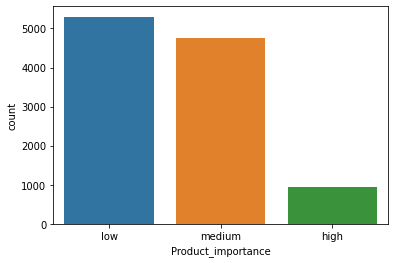

In [13]:
sns.countplot(x=data['Product_importance']);

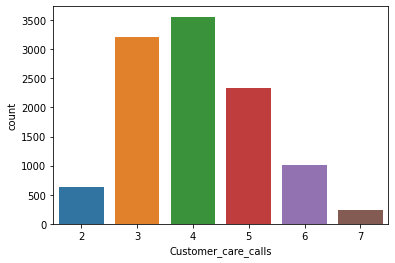

In [14]:
# Customer_care_calls
sns.countplot(x=data['Customer_care_calls']);

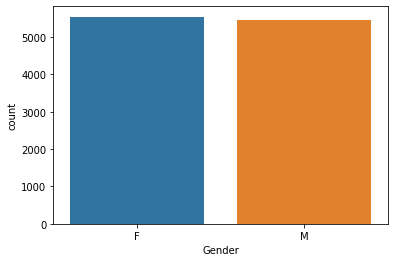

In [15]:
# Gender
sns.countplot(x=data['Gender']);

LabelEncoder를 이용하여 문자를 0부터 시작하는 정수형 숫자로 바꿔주겠습니다.

In [72]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [73]:
objectcolumns = data.select_dtypes(include=["object"])
print(objectcolumns.columns)

Index([], dtype='object')


In [75]:
for a in objectcolumns:
    data[a] = encode.fit_transform(data[a])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      10999 non-null  int64
 1   Mode_of_Shipment     10999 non-null  int64
 2   Customer_care_calls  10999 non-null  int64
 3   Customer_rating      10999 non-null  int64
 4   Cost_of_the_Product  10999 non-null  int64
 5   Prior_purchases      10999 non-null  int64
 6   Product_importance   10999 non-null  int64
 7   Gender               10999 non-null  int64
 8   Discount_offered     10999 non-null  int64
 9   Weight_in_gms        10999 non-null  int64
 10  Reached_on_time      10999 non-null  int64
dtypes: int64(11)
memory usage: 945.4 KB


In [76]:
data['Reached_on_time'].value_counts()

1    6563
0    4436
Name: Reached_on_time, dtype: int64

In [77]:
# data의 feature 간 상관관계
data.corr()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
Warehouse_block,1.000000,0.000617,0.014496,0.010169,-0.006679,-0.005262,0.004260,-0.003700,0.009569,0.004086,0.005214
Mode_of_Shipment,0.000617,1.000000,-0.020164,0.001679,0.006681,-0.001640,0.004911,-0.011288,0.009364,-0.000797,-0.000535
Customer_care_calls,0.014496,-0.020164,1.000000,0.012209,0.323182,0.180771,0.006273,0.002545,-0.130750,-0.276615,-0.067126
Customer_rating,0.010169,0.001679,0.012209,1.000000,0.009270,0.013179,0.003157,0.002775,-0.003124,-0.001897,0.013119
Cost_of_the_Product,-0.006679,0.006681,0.323182,0.009270,1.000000,0.123676,0.006366,0.019759,-0.138312,-0.132604,-0.073587
Prior_purchases,-0.005262,-0.001640,0.180771,0.013179,0.123676,1.000000,0.003662,-0.009395,-0.082769,-0.168213,-0.055515
Product_importance,0.004260,0.004911,0.006273,0.003157,0.006366,0.003662,1.000000,-0.009865,-0.006251,0.001652,-0.023483
Gender,-0.003700,-0.011288,0.002545,0.002775,0.019759,-0.009395,-0.009865,1.000000,-0.011777,0.003573,0.004689
Discount_offered,0.009569,0.009364,-0.130750,-0.003124,-0.138312,-0.082769,-0.006251,-0.011777,1.000000,-0.376067,0.397108
Weight_in_gms,0.004086,-0.000797,-0.276615,-0.001897,-0.132604,-0.168213,0.001652,0.003573,-0.376067,1.000000,-0.268793


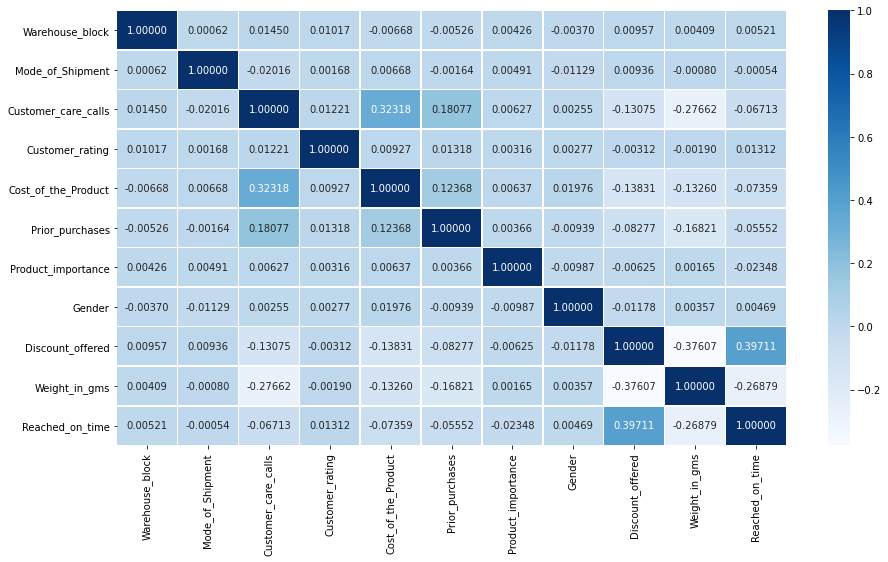

In [78]:
plt.figure(figsize=(15,8))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.5f', linewidths=.5, cmap='Blues')

데이터 셋을 나누겠습니다.

In [79]:
# On_time : 1
# Not On_time : 0
target = 'Reached_on_time'

In [80]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=2)

train.shape, test.shape

((8799, 11), (2200, 11))

In [81]:
# 80/20 비율로 학습/테스트 데이터를 분리합니다.
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)

train.shape, val.shape

((7039, 11), (1760, 11))

In [82]:
# 훈련, 검정 세트로 나누기!
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

이 문제는 분류 문제로, 로지스틱 회귀 분석을 시행할 수 있습니다.

In [83]:
# 타겟 데이터 범주의 비율을 확인합니다.
y_train = train[target]
y_train.value_counts(normalize=True)

1    0.595681
0    0.404319
Name: Reached_on_time, dtype: float64

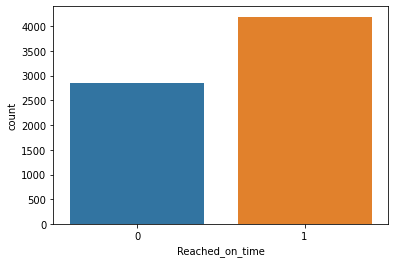

In [84]:
%matplotlib inline
sns.countplot(x=y_train);

(분류문제의 기준모델) 범주 1 (majority class)으로 모든 예측을 수행해 보겠습니다.

In [85]:
# mode(): Return the highest frequency value in a Series.
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
y_pred = [major] * len(y_train)

분류에서는 회귀와 다른 평가지표(evaluation metrics)를 사용합니다.

정확도(Accuracy) 는 분류문제에서 사용하는 평가지표입니다.

이렇게 기준모델로 최다 비율 클래스를 사용할 경우 정확도를 구해 봅시다.

In [86]:
# 최다 클래스의 빈도가 정확도가 됩니다.
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.595681204716579


In [87]:
# 검증세트 에서도 정확도를 확인해 볼 수 있습니다.
y_val = val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

validation accuracy:  0.5960227272727273


로지스틱회귀를 사용하면 타겟변수의 범주로 0과 1을 사용할 수 있으며 각 범주의 예측 확률값을 얻을 수 있습니다.

그래서 결과적으로 관측치가 특정 클래스에 속할 확률값으로 계산이 됩니다. 분류문제에서는 확률값을 사용하여 분류를 하는데, 예를들어 확률값이 정해진 기준값 보다 크면 1 아니면 0 이라고 예측을 하게 됩니다.

## 로지스틱 회귀모델

In [101]:
pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.7/dist-packages (2.2.2)


In [128]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
print('검증세트 정확도', logistic.score(X_val, y_val))

검증세트 정확도 0.6278409090909091


모든 범주를 0으로 분류하는 기준모델보다 정확도가 높게 나왔습니다. 어느정도 학습이 잘 이루어진 것으로 보여집니다. 예측 결과를 보면 0과 1로 예측 한 것을 확인할 수 있습니다.

In [130]:
pred = logistic.predict(X_val)
pred

array([0, 0, 1, ..., 1, 1, 1])

In [131]:
print(features)

print(logistic.coef_)
# 수정사항 : 소숫점자리 5번째까지 표시할 수 있도록

['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']
[[ 1.76365882e-02  2.19915691e-02 -3.41337468e-02  5.44020805e-02
  -8.17492214e-05 -5.26795659e-02 -6.08653371e-03  9.63466413e-03
   1.24492833e-01 -1.63038283e-04]]


계수가 양수인 경우 정시에 도착할 가능성을 높이고 음수인 경우 정시에 도착할 가능성을 낮추는 것으로 해석할 수 있습니다.

###원핫인코딩을 한 데이터로 모델 학습

- 카테고리 데이터 처리를 위해 OneHotEncoder
- 특성들의 척도를 맞추기 위해 표준정규분포로 표준화하는(평균=0, 표준편차=1) StandardScaler

In [33]:
pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 5.7MB/s 


In [102]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
5519,4,2,3,5,222,2,1,1,9,1321
8887,4,1,3,4,219,6,1,0,2,1837
10569,1,2,4,4,156,2,1,0,5,5216
9856,2,1,4,4,185,2,2,0,1,4729
587,4,2,3,5,194,2,2,1,4,3496


원핫인코딩을 수행합니다.

In [103]:
encoder = OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_train_encoded.head(3)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
5519,4,2,3,5,222,2,1,1,9,1321
8887,4,1,3,4,219,6,1,0,2,1837
10569,1,2,4,4,156,2,1,0,5,5216


특성값들을 표준화 합니다.

In [104]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

In [105]:
X_train_scaled

array([[ 1.11561325,  0.63767522, -0.91109739, ...,  1.0027029 ,
        -0.26893316, -1.42766981],
       [ 1.11561325, -0.6860039 , -0.91109739, ..., -0.99730439,
        -0.70121421, -1.11113109],
       [-0.90085555,  0.63767522, -0.03569273, ..., -0.99730439,
        -0.5159509 ,  0.96170681],
       ...,
       [-1.57301181, -0.6860039 , -0.91109739, ..., -0.99730439,
         3.18931527, -1.42766981],
       [-1.57301181,  0.63767522, -1.78650205, ...,  1.0027029 ,
         0.41036564, -1.11419832],
       [ 1.11561325,  0.63767522, -0.91109739, ...,  1.0027029 ,
        -0.39244203,  1.05617767]])

평균은 0, 표준편차는 1로 표준화 되었습니다.

In [106]:
X_train_scaled.T[0].mean(), X_train_scaled.T[0].std()

(0.0, 1.0)

In [107]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
y_pred_scaled = model.predict(X_val_scaled)
print("validation accuracy :", accuracy_score(y_val, y_pred_scaled))

validation accuracy : 0.6369318181818182


In [142]:
predictions = model.predict(X_test)

In [144]:
print("test accuracy :", accuracy_score(predictions, y_test))

#테스트세트 정확도가 낮다..ㅎ

test accuracy : 0.39954545454545454


In [149]:
pipe_lrone = make_pipeline(
    OneHotEncoder(), 
    SimpleImputer(), 
    LogisticRegression(n_jobs=-1)
)
pipe_lrone.fit(X_train, y_train)

print('검증세트 정확도', pipe_lrone.score(X_val, y_val))

검증세트 정확도 0.6278409090909091


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [150]:
print('테스트세트 정확도', pipe_lrone.score(X_test, y_test))

테스트세트 정확도 0.6290909090909091


그냥 원핫인코딩이 아닌, 순서형 인코딩으로 학습시켜 보겠습니다.

In [151]:
pipe_lrord = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),  
    LogisticRegression(n_jobs=-1)
)
pipe_lrord.fit(X_train, y_train)

print('검증세트 정확도', pipe_lrord.score(X_val, y_val))

검증세트 정확도 0.6278409090909091


In [152]:
print('테스트세트 정확도', pipe_lrord.score(X_test, y_test))

테스트세트 정확도 0.6290909090909091


## 랜덤포레스트 적용

분류문제일 경우 다수결로 가장 많은 모델들이 선택한 범주로 예측합니다.

랜덤포레스트는 앙상블(Ensemble) 방법입니다.
- 앙상블 방법은 한 종류의 데이터로 여러 머신러닝 학습모델(weak base learner, 기본모델)을 만들어 그 모델들의 예측결과를 다수결이나 평균을 내어 예측하는 방법을 말합니다. 이론적으로 기본모델 몇가지 조건을 충족하는 여러 종류의 모델을 사용할 수 있습니다.

- 랜덤포레스트는 결정트리를 기본모델로 사용하는 앙상블 방법이라 할 수 있습니다.

- 결정트리들은 독립적으로 만들어지며 각각 랜덤으로 예측하는 성능보다 좋을 경우 랜덤포레스트는 결정트리보다 성능이 좋습니다.

부트스트랩(Bootstrap) 샘플링

앙상블에 사용하는 작은 모델들은 부트스트래핑(bootstraping)이라는 샘플링과정으로 얻은 부트스트랩세트를 사용해 학습을 합니다. 즉 원본 데이터에서 샘플링을 하는데 복원추출을 한다는 것인데 복원추출은 샘플을 뽑아 값을 기록하고 제자리에 돌려놓는 것을 말합니다.

이렇게 샘플링을 특정한 수 만큼 반복하면 하나의 부트스트랩세트가 완성됩니다. 복원추출이기 때문에 부트스트랩세트에는 같은 샘플이 반복될 수 있습니다.

랜덤포레스트를 적용해보겠습니다.
(원핫인코더)

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도:  0.6551136363636364


순서형 인코딩으로 학습해 보았습니다.

In [133]:
from category_encoders import OrdinalEncoder

# ordinal encoding
pipe_ord = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=10, n_jobs=-1, oob_score=True)
)

pipe_ord.fit(X_train, y_train)
print('검증 정확도', pipe_ord.score(X_val, y_val))

검증 정확도 0.6551136363636364


#### 랜텀포레스트 특성 중요도 비교 (onehot vs ordinal)?

랜덤포레스트에서는 학습 후에 특성들의 중요도 정보(Gini importance)를 기본으로 제공합니다. 중요도는 노드들의 지니불순도(Gini impurity)를 가지고 계산하는데

노드가 중요할 수록 불순도가 크게 감소한다는 사실을 이용합니다.

노드는 한 특성의 값을 기준으로 분리가 되기 때문에 불순도를 크게 감소하는데 많이 사용된 특성이 중요도가 올라갈 것입니다.

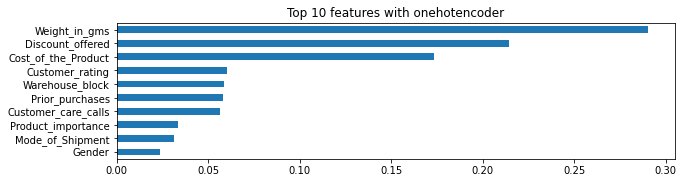

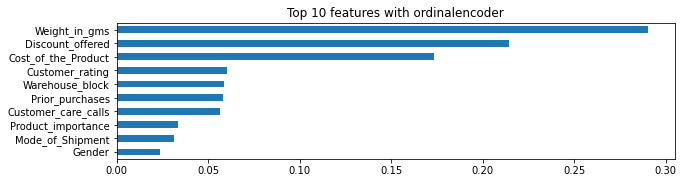

In [134]:
import matplotlib.pyplot as plt

# 특성 중요도(onehot)
rf = pipe.named_steps['randomforestclassifier']
colnames = pipe.named_steps['onehotencoder'].get_feature_names()
importances = pd.Series(rf.feature_importances_, colnames)

n = 10
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with onehotencoder')
importances.sort_values()[-n:].plot.barh();


# 특성 중요도(ordinal)
rf_ord = pipe_ord.named_steps['randomforestclassifier']
importances_ord = pd.Series(rf_ord.feature_importances_, X_train.columns)

plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with ordinalencoder')
importances_ord.sort_values()[-n:].plot.barh();

In [153]:
# F1 score 계산해보기
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=6,random_state=2, criterion='entropy')
)

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_val_pred = pipe.predict(X_val)

print('f1 score_train: ', f1_score(y_train, y_train_pred))
print('f1 score_val: ', f1_score(y_val, y_val_pred))

f1 score_train:  0.6655415771709113
f1 score_val:  0.6563275434243176
